# Chapter 3. Unsupervised Learning methods.
# Part 3. Clustering

## - k-Means Clustering

Clustering differs from classification in that it has no clue of true labels and tries to automatically find those so the only information it could get out of found clusters is that samples in it are similar to each other.

The algorithm is iterative:

1) randomly assign k given cluster centers

2) assign cluster labels to nearest samples

3) calculate centroids and shift cluster centers to them respectively

4) reassign cluster labels to nearest samples

5) repeat 2-5 untill samples would stop reassigning their labels

Applying k-Means Clustering:

Cluster affiliations: [1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]

Prognostications: [1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


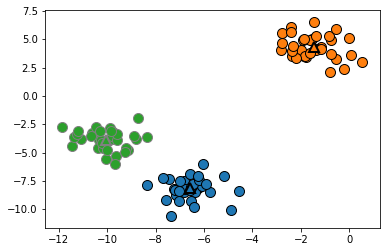

In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import mglearn

#loading dataset
X, y = make_blobs(random_state=1)

#k-Means initialization and building
kmeans = KMeans(n_clusters=3).fit(X)

#calculated affiliation to clusters
#they are stored in 'labels_'
print('Cluster affiliations: {}\n'.format(kmeans.labels_))

#predicting affiliations to samples (in this case samples are...
#...the same as the train ones)
#to make prognostications, use the 'predict' method
print('Prognostications: {}'.format(kmeans.predict(X)))

#results visualization
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0,1,2], markers='^', markeredgewidth=2)

k-Means Clustering can't be apllied to datasets that can't be correctly clusterized by assigning labels to nearest cluster centers.

## k-Means as Decomposition method (vector quantization)
In compare to other decomposition methods as PCA and NMF that intended to narrow feature space, k-Means intended to expand feature space by found clusters. In some cases it lets algorithms to operate with data more accurately.

Cluster affiliations:
[9 2 5 4 2 7 9 6 9 6 1 0 2 6 1 9 3 0 3 1 7 6 8 6 8 5 2 7 5 8 9 8 6 5 3 7 0
 9 4 5 0 1 3 5 2 8 9 1 5 6 1 0 7 4 6 3 3 6 3 8 0 4 2 9 6 4 8 2 8 4 0 4 0 5
 6 4 5 9 3 0 7 8 0 7 5 8 9 8 0 7 3 9 7 1 7 2 2 0 4 5 6 7 8 9 4 5 4 1 2 3 1
 8 8 4 9 2 3 7 0 9 9 1 5 8 5 1 9 5 6 7 9 1 4 0 6 2 6 4 7 9 5 5 3 8 1 9 5 6
 3 5 0 2 9 3 0 8 6 0 3 3 5 6 3 2 0 2 3 0 2 6 3 4 4 1 5 6 7 1 1 3 2 4 7 2 7
 3 8 6 4 1 4 3 9 9 5 1 7 5 8 2]


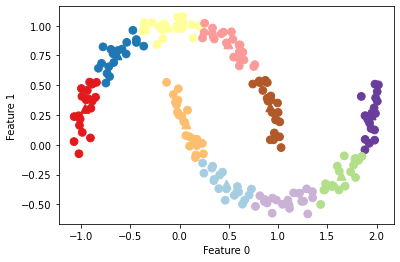

In [2]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

#loading dataset
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
#k-Means initialization and building
kmeans = KMeans(n_clusters=10, random_state=0).fit(X)

y_pred = kmeans.predict(X)

#rendering results
plt.scatter(X[:,0], X[:,1], c=y_pred, s=60, cmap="Paired")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=60, marker='^', c=range(kmeans.n_clusters), linewidth=2, cmap='Paired')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
print('Cluster affiliations:\n{}'.format(y_pred))

^ Now 2 labels of dataset can be separated by linear model

To get even more information for feature there could be calculated distances for a sample to each cluster center (by 'transform' method):

In [3]:
distance_features = kmeans.transform(X)
print(distance_features.shape)
print('Distant features:\n{}'.format(distance_features))

(200, 10)
Distant features:
[[0.9220768  1.46553151 1.13956805 ... 1.16559918 1.03852189 0.23340263]
 [1.14159679 2.51721597 0.1199124  ... 0.70700803 2.20414144 0.98271691]
 [0.78786246 0.77354687 1.74914157 ... 1.97061341 0.71561277 0.94399739]
 ...
 [0.44639122 1.10631579 1.48991975 ... 1.79125448 1.03195812 0.81205971]
 [1.38951924 0.79790385 1.98056306 ... 1.97788956 0.23892095 1.05774337]
 [1.14920754 2.4536383  0.04506731 ... 0.57163262 2.11331394 0.88166689]]


## - Aglomerative Clustering

The algorithm iteratively unites 2 nearest clusters into a single and starts with every samples as their own clusters themselves. It ends when the number of clusters reaches setted 'n_clusters' value.

There are 3 methods to unite clusters:

1) 'ward' - Default. Uniting 2 clusters if their dispersion in new cluster would be minimal in compare to other pairs

2) 'average' - Uniting 2 clusters if their mean distances between samples is minimal in compare to other pairs

3) 'complete' - Uniting 2 clusters if their most distant samples have the minimalest distance in compare to other pairs

The algorithm isn't able to predict clusters for samples that wasn't in train dataset.

Text(0, 0.5, 'Feature 1')

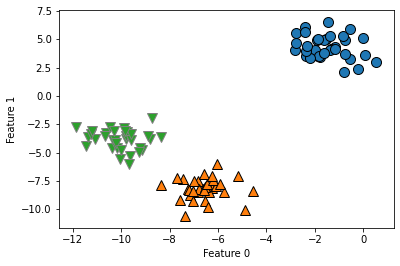

In [4]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
import mglearn
import matplotlib.pyplot as plt

#loading dataset
X,y = make_blobs(random_state=1)

#algorithm initializing, building and applying
agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)

#rendering gain clusters
mglearn.discrete_scatter(X[:,0], X[:,1], assignment)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

The algorithm requires a number of desired clusters. This number can be figured by building dendrogram of algorithm processing.

Building agglomerative clustering dendrogram:

Text(0, 0.5, 'Distances between clusters')

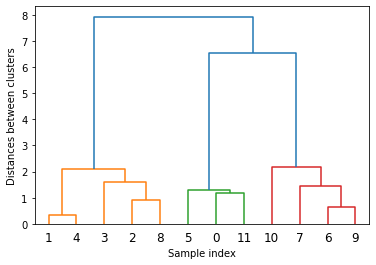

In [5]:
#sklearn doesn't have tols to build dendrogramms but...
#...those can be built by SciPy tools
from scipy.cluster.hierarchy import dendrogram, ward

#loading dataset
X, y = make_blobs(random_state=0, n_samples=12)
#applying SciPy ward clustering to get linkage array that includes...
#...similarities between clusters represented as distances
linkage_array = ward(X)
#Building dendrogram using gain linkage_array
dendrogram(linkage_array)

plt.xlabel('Sample index')
plt.ylabel('Distances between clusters')

^ As it seemed by dendrogram, the distances between 3 clusters is quite long. That's the sign that the number of clusters of 3 is right.

## - DBSCAN

DBSCAN defines cluster as a lot of core samples that has at least 'min_samples' neighbors in 'eps' radius and border samples that doesn't have enough of neighbors but were defined as neighbors to core samples. All the rest - noise samples with no class assigned.

DBSCAN can't predict labels for new samples.

It's recomended to scale dataset. ('StandardScaler' or 'MinMaxScaler')

Text(0, 0.5, 'Feature 1')

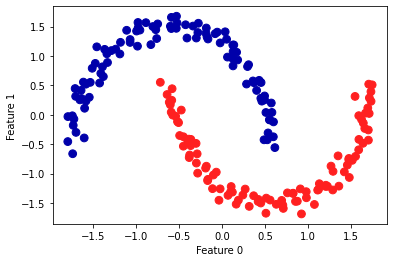

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

#loading dataset
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

#scaling dataset
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

#DBSCAN initialization, building and applying
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)

#rendering gain clusters
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

^ DBSCAN identified clusters quite correct. Even with default 'eps' and 'min_samples' params.

## - Classification quality Analysis

## Quality Metrics

Metrics can be used for labeled and unlabeled data.

#### Labeled data classification metrics

There are 2 quality metrics for labeled data:

1) ARI - 'adjusted_rand_score'. Returns number from -1 to 1

2) NMI - 'normalized_mutual_info_score'. Returns number from 0 to 1

For both 0 is random clusterization and 1 is absolute correct

Taking ARI for k-Mean, agglomerative and DBSCAN algorithms:

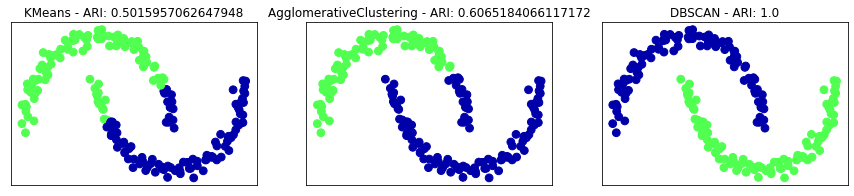

In [7]:
from sklearn.metrics.cluster import adjusted_rand_score

X,y = make_moons(n_samples=200, noise=0.05, random_state=0)
#-----scaling data
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

#-----rendering data
fig, axes = plt.subplots(1,3, figsize=(15,3), subplot_kw={'xticks': (), 'yticks': ()})
#--preparing list of used algorithms
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]
#--rendering clusters
for ax,algorithm in zip(axes[0:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:,0], X_scaled[:,1], c=clusters, cmap=mglearn.cm3, s=60)
    ax.set_title('{} - ARI: {}'.format(algorithm.__class__.__name__, adjusted_rand_score(y, clusters)))

^ Intuitive results.

It's important to use 'adjusted_rand_score' or 'normalized_mutual_info_score' for scoring clusterization results instead of 'accuracy_score'

#### Unlabeled data classification metrics

There is only 1 quality metric for unlabeled data:

1) Silhouette coefficient - 'silhouette_score'. Returns number from 0 to 1 where 0 is random clusterization and 1 is absolute correct. However, it works bad.

There's also Robustness-based clustering metrics but scikit-learn doesn't have those.

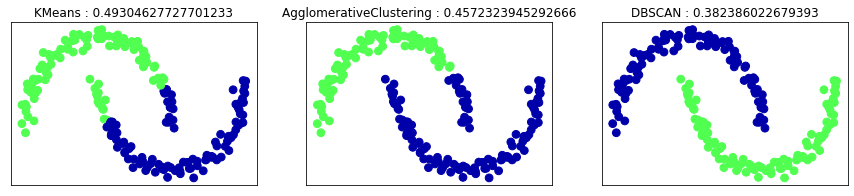

In [8]:
from sklearn.metrics.cluster import silhouette_score

X,y = make_moons(n_samples=200, noise=0.05, random_state=0)
#-----scaling data
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

#-----rendering clusters
fig,axes = plt.subplots(1,3, figsize=(15,3), subplot_kw={'xticks': (), 'yticks':()})
for ax, algorithm in zip(axes[0:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:,0], X_scaled[:,1], c=clusters, cmap=mglearn.cm3, s=60)
    ax.set_title('{} : {}'.format(algorithm.__class__.__name__, silhouette_score(X_scaled, clusters)))

^ Silhouette coefficients works bad.

## Manual Analysis of clusterization

It's useful to analyse clusterization manually. Each algorithm can provide additional understanding of dataset.

Preparing dataset and PCA components to work with:

In [9]:
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_lfw_people
import numpy as np

#-----loading dataset and makind it symmetrical
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]

#changing diapason of brightness from 0 to 255 to 0 to 1:
X_people = X_people / 255

#-----initializing, building and applying PCA
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_people)
X_pca = pca.transform(X_people)

<ipython-input-9-248b1f674eab>:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(people.target.shape, dtype=np.bool)


#### Analysis via DBSCAN. Outliers detection.

To perform Outliers detection, there can be applied params for DBSCAN in such way so there would be found a small group of noise samples situated out of main cluster:

Clusters: [-1  0]
Clusters sizes: [  31 2032]
Noise cluster:



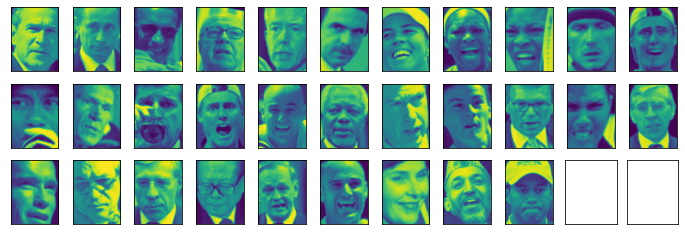

In [10]:
#DBSCAN initialization with 'min_samples'=3 and 'eps'=15
dbscan = DBSCAN(min_samples=3, eps=15)
#building and applying DBSCAN to get clustering results
labels = dbscan.fit_predict(X_pca)
print('Clusters: {}'.format(np.unique(labels)))
print('Clusters sizes: {}'.format(np.bincount(labels+1)))

#Rendering outliers
print('Noise cluster:\n')
noise = X_people[labels==-1]
fig, axes = plt.subplots(3,11, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(12,4))
for image, ax in zip(noise, axes.ravel()):
    ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)

Analysing clustering with different params:

In [11]:
for eps in [1,3,5,7,9,11,13]:
    print('\neps={}'.format(eps))
    dbscan = DBSCAN(eps=eps,min_samples=3)
    labels = dbscan.fit_predict(X_pca)
    print('Gain clusters: {}'.format(np.unique(labels)))
    print('Shape of clusters: {}'.format(np.bincount(labels+1)))


eps=1
Gain clusters: [-1]
Shape of clusters: [2063]

eps=3
Gain clusters: [-1]
Shape of clusters: [2063]

eps=5
Gain clusters: [-1]
Shape of clusters: [2063]

eps=7
Gain clusters: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12]
Shape of clusters: [2003    4   14    7    4    3    3    4    4    3    3    5    3    3]

eps=9
Gain clusters: [-1  0  1  2]
Shape of clusters: [1306  751    3    3]

eps=11
Gain clusters: [-1  0]
Shape of clusters: [ 413 1650]

eps=13
Gain clusters: [-1  0]
Shape of clusters: [ 120 1943]


^ the most interesting is clustering with 'eps=7'

Rendering gain small clusters with params 'eps=7' and 'min_samples=3' to analyse them:

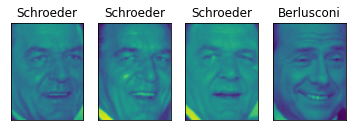

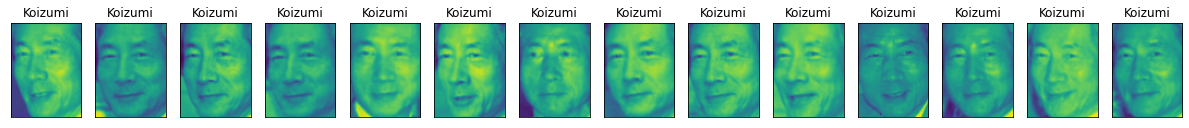

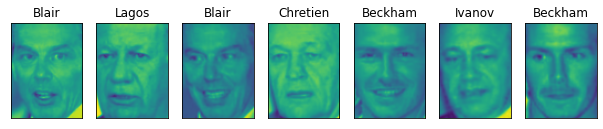

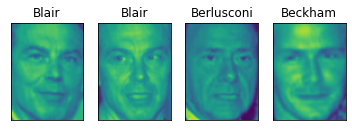

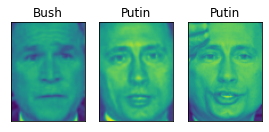

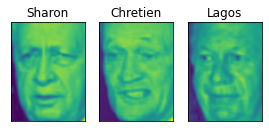

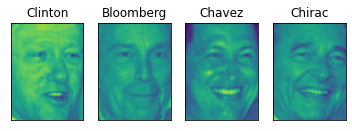

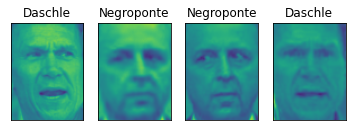

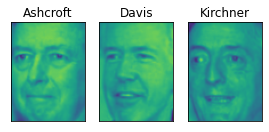

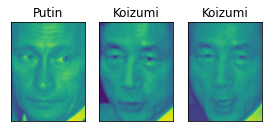

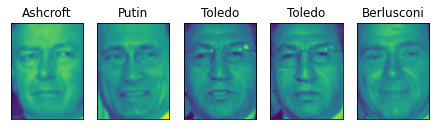

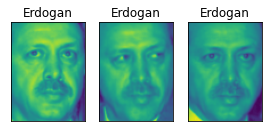

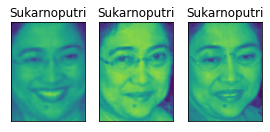

In [12]:
#-----DBSCAN initialization
dbscan = DBSCAN(min_samples=3, eps=7)
#building and applying DBSCAN to get clustering results
labels = dbscan.fit_predict(X_pca)

#-----render all 13 found clusters
#--preparing axes for each cluster
#'range(max(labels)+1)' is a count of clusters
for cluster in range(max(labels)+1):
    #'labels==cluster' returns boolean array with 'true' at...
    #...coincedental elements
    mask = labels==cluster
    #getting the count of 'trues'
    n_images = np.sum(mask)
    fig,axes = plt.subplots(1, n_images, figsize=(n_images*1.5,4), subplot_kw={'xticks': (), 'yticks': ()})

    #--filling axes with data
    for image, label, ax in zip(X_people[mask], y_people[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1])

^ found clusters have similar images

#### Analysis via k-Means

k-Means is able to find more uniform clusters. Since it's unknown how many clusters there would be correctly found, it's a good tactic to start with a small number - 10.

Rendering cluster centers to analyse them:

Clusters shape: [113 256 188 147 216 180 258 211 139 355]


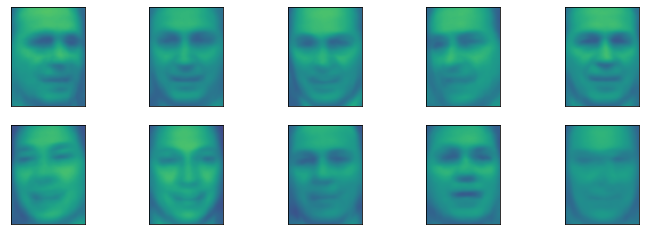

In [18]:
#-----initializing, building and applying k-Means
km = KMeans(n_clusters=10, random_state=0)
labels_km = km.fit_predict(X_pca)
print('Clusters shape: {}'.format(np.bincount(labels_km)))

#-----rendering k-Mean cluster centers
fig,axes = plt.subplots(2,5, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(12,4))
for center,ax in zip(km.cluster_centers_, axes.ravel()):
    #'inverse_transform' needed to transform sample back to...
    #...the original feature space so it's possible to render it
    ax.imshow(pca.inverse_transform(center).reshape(image_shape), vmin=0, vmax=1)

Gain cluster centers are blurry since center itself is a mean of samples that included in corresponding cluster

#### Analysis via Agglomerative clustering

Agglomerative and k-Mean algorithms can both generate uniform clusters but since they have different processing, gain clusters would be not similar.

In [20]:
#initialization, building and applying Agglomerative clustering
agglomerative = AgglomerativeClustering(n_clusters=10)
labels_agg = agglomerative.fit_predict(X_pca)
print('Clusters shape: {}'.format(np.bincount(labels_agg)))

#comparing clustering
print('ARI (agg vs km): {}'.format(adjusted_rand_score(labels_agg, labels_km)))

Clusters shape: [478 254 317 119  96 191 424  17  55 112]
ARI (agg vs km): 0.06975311521947072


^ Agg and k-Means clustering differs a lot.

Dendrogram can't provide distinct number of clusters that would be correct for this dataset:

Text(0, 0.5, 'Clusters distances')

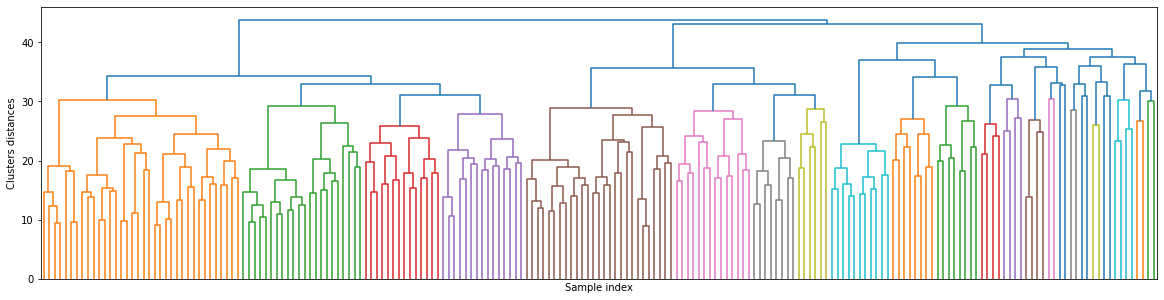

In [25]:
#-----building linkage array
linkage_array = ward(X_pca)

#-----rendering dendrogram
plt.figure(figsize=(20,5))
#'p=7' limits the depth of dendrogram
dendrogram(linkage_array, p=7, truncate_mode='level', no_labels=True)
plt.xlabel('Sample index')
plt.ylabel('Clusters distances')

Rendering gain 10 clusters:

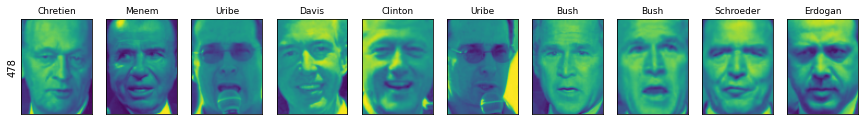

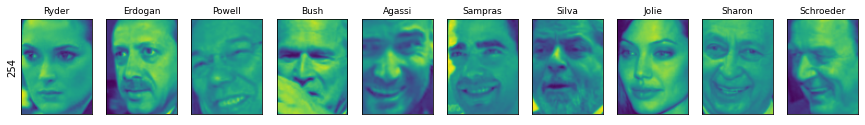

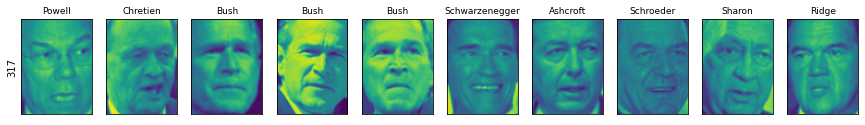

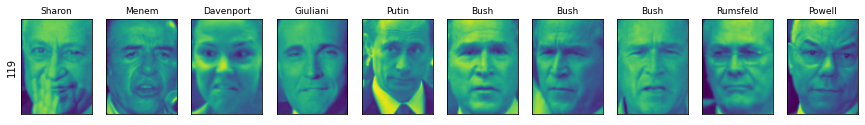

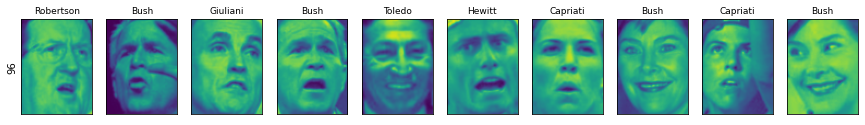

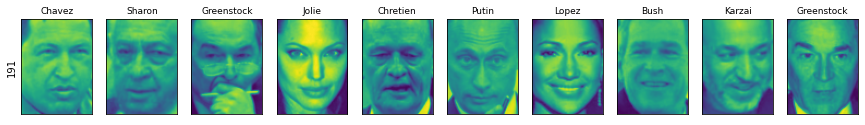

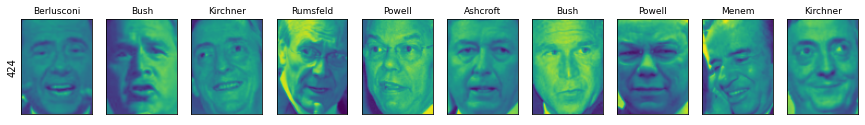

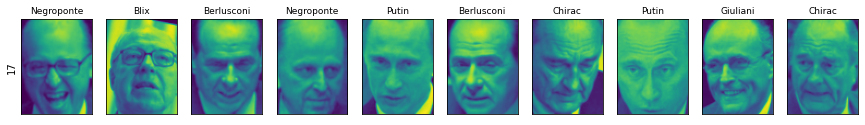

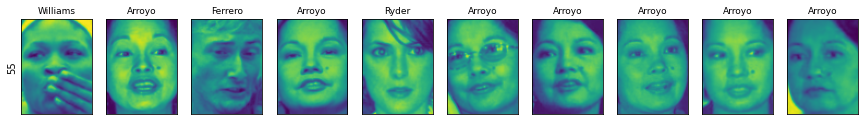

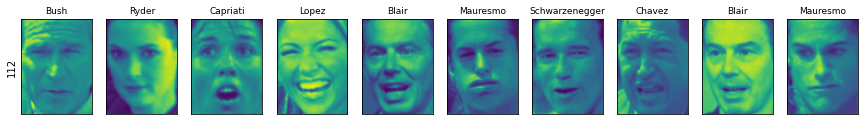

In [27]:
n_clusters = 10
for cluster in range(n_clusters):
    mask = labels_agg==cluster
    fig,axes = plt.subplots(1,10, subplot_kw={'xticks':(), 'yticks':()}, figsize=(15,8))
    axes[0].set_ylabel(np.sum(mask))
    for image,label,ax in zip(X_people[mask], y_people[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1], fontdict={'fontsize':9})

^ gain clusters are too large to have similar samples.

Building 40 clusters:

Clusters shape: [ 72 116  52 101 189 121  44   2 155  24  34  30  29  22   6  71  54 131
  41  53  20  96  30  36  12  61  54   8 182  19   7  17  50   5  22  22
  35  11  27   2]


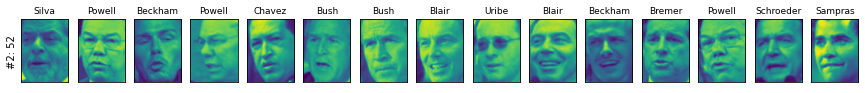

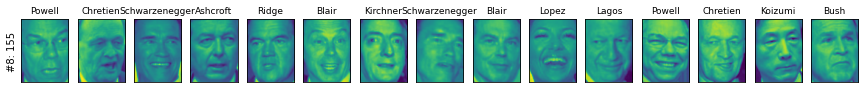

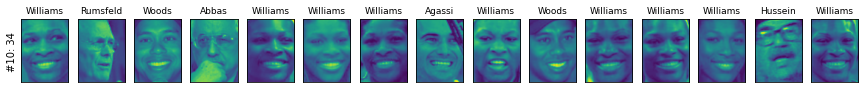

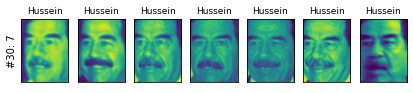

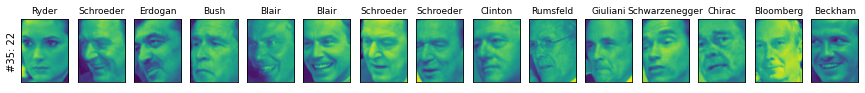

In [30]:
#initialization, building and applying Agglomerative clustering
agglomerative = AgglomerativeClustering(n_clusters=40)
labels_agg = agglomerative.fit_predict(X_pca)
print("Clusters shape: {}".format(np.bincount(labels_agg)))

#rendering some of built clusters
n_clusters = 40
for cluster in [2,8,10,30,35]:
    mask = labels_agg==cluster
    fig,axes = plt.subplots(1,15, subplot_kw={'xticks':(), 'yticks':()}, figsize=(15,8))
    cluster_size = np.sum(mask)
    axes[0].set_ylabel('#{}: {}'.format(cluster, cluster_size))
    for image,label,ax in zip(X_people[mask], y_people[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1], fontdict={'fontsize':9})
    for i in range(cluster_size, 15):
        axes[i].set_visible(False)

^ now clusters small enough to have similar samples.